In [1]:
%matplotlib inline
#import sys    
#reload(sys)  
#sys.setdefaultencoding('utf8')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates

from __future__ import print_function # for python 2
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
filename="stundenwerte_FF_01048_19730101_20151231_hist.zip"   #ORT: DD Klotzsche historisch

In [3]:
!wget "ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/wind/historical/$filename"

--2016-11-06 18:13:44--  ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/wind/historical/stundenwerte_FF_01048_19730101_20151231_hist.zip
           => »stundenwerte_FF_01048_19730101_20151231_hist.zip«
Auflösen des Hostnamen »ftp-cdc.dwd.de (ftp-cdc.dwd.de)«... 141.38.3.177
Verbindungsaufbau zu ftp-cdc.dwd.de (ftp-cdc.dwd.de)|141.38.3.177|:21... verbunden.
Anmelden als anonymous ... Angemeldet!
==> SYST ... fertig.    ==> PWD ... fertig.
==> TYPE I ... fertig.  ==> CWD (1) /pub/CDC/observations_germany/climate/hourly/wind/historical ... fertig.
==> SIZE stundenwerte_FF_01048_19730101_20151231_hist.zip ... 1637206
==> PASV ... fertig.    ==> RETR stundenwerte_FF_01048_19730101_20151231_hist.zip ... fertig.
Länge: 1637206 (1,6M) (unmaßgeblich)

100%[======================================>] 1.637.206    537KB/s   in 3,0s   

2016-11-06 18:13:48 (537 KB/s) - »stundenwerte_FF_01048_19730101_20151231_hist.zip« gespeichert [1637206]



In [13]:
!rm *_01048*.txt
!rm *_01048*.html
!unzip $filename

Archive:  stundenwerte_FF_01048_19730101_20151231_hist.zip
  inflating: Beschreibung_wind_Element_Detail_01048.html  
  inflating: Beschreibung_wind_Geraete_Detail_01048.html  
  inflating: produkt_wind_Terminwerte_19730101_20151231_01048.txt  
  inflating: Stationsmetadaten_wind_stationen_01048_19730101_20151231.txt  


In [14]:
pd.read_csv("Stationsmetadaten_wind_stationen_01048_19730101_20151231.txt",sep=";")

,Stations_id,Stationshoehe,Geogr.Breite,Geogr.Laenge,von_datum,bis_datum,Stationsname,
0,1048,152,51.0833,13.7667,19280101,19331231,Dresden-Klotzsche ...,NaN
1,1048,152,51.0983,13.7489,19340101,19350710,Dresden-Klotzsche ...,NaN
2,1048,229,51.1235,13.7640,19350711,19560419,Dresden-Klotzsche ...,NaN
3,1048,222,51.1330,13.7732,19560420,19900731,Dresden-Klotzsche ...,NaN
4,1048,222,51.1327,13.7721,19900801,19920731,Dresden-Klotzsche ...,NaN
5,1048,222,51.1327,13.7721,19920801,19950831,Dresden-Klotzsche ...,NaN
6,1048,227,51.1280,13.7543,19950901,,Dresden-Klotzsche ...,NaN


In [15]:
dwd_wind=pd.read_csv("produkt_wind_Terminwerte_19730101_20151231_01048.txt",sep=";")
dwd_wind.tail()

/home/noel3/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,WINDGESCHWINDIGKEIT,WINDRICHTUNG,eor
372283,1048,2.015123e+09,7.0,61.0,5.0,160.0,eor
372284,1048,2.015123e+09,7.0,61.0,4.5,170.0,eor
372285,1048,2.015123e+09,7.0,61.0,2.7,160.0,eor
372286,1048,2.015123e+09,7.0,61.0,3.1,180.0,eor
372287,,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dwd_wind.columns=dwd_wind.columns.str.strip()

In [17]:
dwd_wind = dwd_wind[np.isfinite(dwd_wind['MESS_DATUM'])]
dwd_wind.index=pd.to_datetime(dwd_wind.MESS_DATUM.astype(int), format='%Y%m%d%H')
dwd_wind[dwd_wind.WINDGESCHWINDIGKEIT==-999] =np.NaN

dwd_wind.tail()

,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,WINDGESCHWINDIGKEIT,WINDRICHTUNG,eor
MESS_DATUM,,,,,,,
2015-12-31 19:00:00,1048,2.015123e+09,7.0,61.0,5.6,160.0,eor
2015-12-31 20:00:00,1048,2.015123e+09,7.0,61.0,5.0,160.0,eor
2015-12-31 21:00:00,1048,2.015123e+09,7.0,61.0,4.5,170.0,eor
2015-12-31 22:00:00,1048,2.015123e+09,7.0,61.0,2.7,160.0,eor
2015-12-31 23:00:00,1048,2.015123e+09,7.0,61.0,3.1,180.0,eor


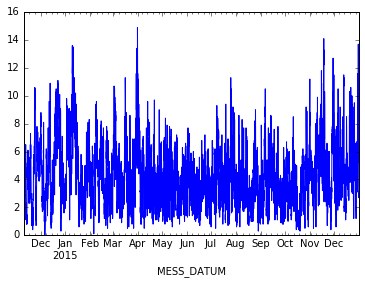

In [18]:
dwd_wind[-10000:].WINDGESCHWINDIGKEIT.plot()

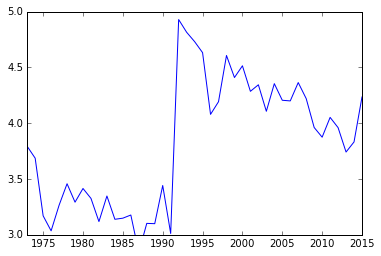

In [19]:
g=dwd_wind.groupby(dwd_wind.index.year)
g.mean()
g.WINDGESCHWINDIGKEIT.mean().plot(ylim=(3,5))

In [20]:
g.WINDGESCHWINDIGKEIT.mean().mean(),"+-",g.WINDGESCHWINDIGKEIT.mean().std()

(3.826014789453165, '+-', 0.5825790445386781)

In [21]:
#(g.WINDGESCHWINDIGKEIT.mean()[0:10].mean()/g.WINDGESCHWINDIGKEIT.mean()[-10:].mean())**3
##23% weniger Windenergie

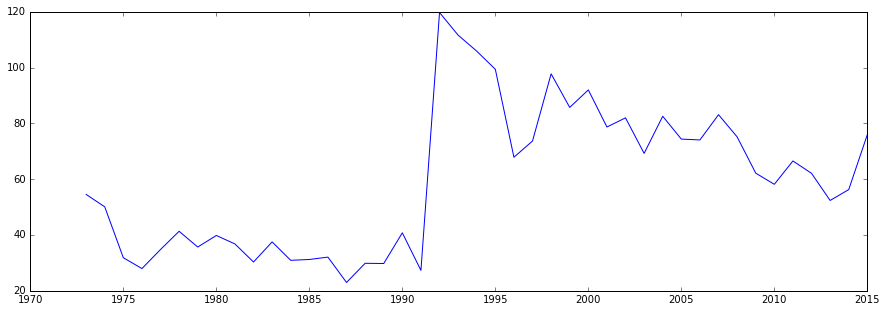

In [22]:
fig=plt.figure(figsize=(15,5))
plt.plot(g.WINDGESCHWINDIGKEIT.mean()**3)

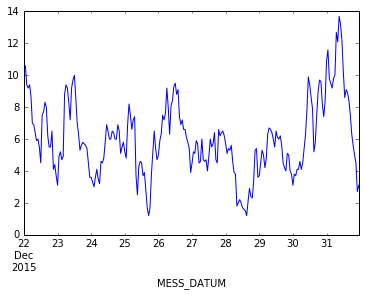

In [23]:
dwd_wind.WINDGESCHWINDIGKEIT[-240:].plot()

In [24]:
filename="stundenwerte_FF_01048_akt.zip" 
!wget "ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/wind/recent/$filename"

--2016-11-06 18:21:18--  ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/hourly/wind/recent/stundenwerte_FF_01048_akt.zip
           => »stundenwerte_FF_01048_akt.zip«
Auflösen des Hostnamen »ftp-cdc.dwd.de (ftp-cdc.dwd.de)«... 141.38.3.177
Verbindungsaufbau zu ftp-cdc.dwd.de (ftp-cdc.dwd.de)|141.38.3.177|:21... verbunden.
Anmelden als anonymous ... Angemeldet!
==> SYST ... fertig.    ==> PWD ... fertig.
==> TYPE I ... fertig.  ==> CWD (1) /pub/CDC/observations_germany/climate/hourly/wind/recent ... fertig.
==> SIZE stundenwerte_FF_01048_akt.zip ... 67023
==> PASV ... fertig.    ==> RETR stundenwerte_FF_01048_akt.zip ... fertig.
Länge: 67023 (65K) (unmaßgeblich)

100%[======================================>] 67.023       308KB/s   in 0,2s   

2016-11-06 18:21:19 (308 KB/s) - »stundenwerte_FF_01048_akt.zip« gespeichert [67023]



In [25]:
!rm *_01048*.html
!unzip $filename

Archive:  stundenwerte_FF_01048_akt.zip
  inflating: Beschreibung_wind_Element_Detail_01048.html  
  inflating: Beschreibung_wind_Geraete_Detail_01048.html  
  inflating: produkt_wind_Terminwerte_20150506_20161105_01048.txt  
  inflating: Stationsmetadaten_wind_stationen_01048_20150506_20161105.txt  


In [26]:
pd.read_csv("Stationsmetadaten_wind_stationen_01048_20150506_20161105.txt",sep=";")

,Stations_id,Stationshoehe,Geogr.Breite,Geogr.Laenge,von_datum,bis_datum,Stationsname,
0,1048,152,51.0833,13.7667,19280101,19331231,Dresden-Klotzsche ...,NaN
1,1048,152,51.0983,13.7489,19340101,19350710,Dresden-Klotzsche ...,NaN
2,1048,229,51.1235,13.7640,19350711,19560419,Dresden-Klotzsche ...,NaN
3,1048,222,51.1330,13.7732,19560420,19900731,Dresden-Klotzsche ...,NaN
4,1048,222,51.1327,13.7721,19900801,19920731,Dresden-Klotzsche ...,NaN
5,1048,222,51.1327,13.7721,19920801,19950831,Dresden-Klotzsche ...,NaN
6,1048,227,51.1280,13.7543,19950901,,Dresden-Klotzsche ...,NaN


In [27]:
akt_wind=pd.read_csv("produkt_wind_Terminwerte_20150506_20161105_01048.txt",sep=";")
akt_wind.head()

,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,WINDGESCHWINDIGKEIT,WINDRICHTUNG,eor
0,1048,2015050600,10,61,3.1,330,eor
1,1048,2015050601,10,61,2.5,300,eor
2,1048,2015050602,10,61,2.1,270,eor
3,1048,2015050603,10,61,1.8,280,eor
4,1048,2015050604,10,61,1.1,290,eor


In [28]:
akt_wind.columns=akt_wind.columns.str.strip()
akt_wind = akt_wind[np.isfinite(akt_wind['MESS_DATUM'])]
akt_wind.index=pd.to_datetime(akt_wind.MESS_DATUM.astype(int), format='%Y%m%d%H')
akt_wind[akt_wind.WINDGESCHWINDIGKEIT==-999] =np.NaN

akt_wind.tail()

,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,WINDGESCHWINDIGKEIT,WINDRICHTUNG,eor
MESS_DATUM,,,,,,,
2016-11-05 19:00:00,1048.0,2.016111e+09,1.0,61.0,1.9,210.0,eor
2016-11-05 20:00:00,1048.0,2.016111e+09,1.0,61.0,2.1,200.0,eor
2016-11-05 21:00:00,1048.0,2.016111e+09,1.0,61.0,2.5,190.0,eor
2016-11-05 22:00:00,1048.0,2.016111e+09,1.0,61.0,2.7,230.0,eor
2016-11-05 23:00:00,1048.0,2.016111e+09,1.0,61.0,2.9,240.0,eor


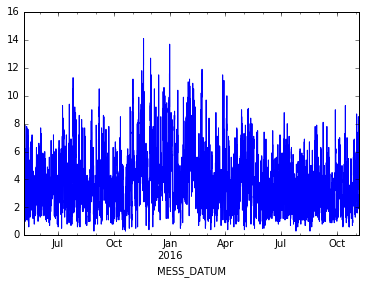

In [29]:
akt_wind.WINDGESCHWINDIGKEIT.plot()

In [30]:
akt_wind.mean()

STATIONS_ID            1.048000e+03
MESS_DATUM             2.015634e+09
QUALITAETS_NIVEAU      7.056441e+00
STRUKTUR_VERSION       6.100000e+01
WINDGESCHWINDIGKEIT    3.901335e+00
WINDRICHTUNG           2.031240e+02
dtype: float64

In [31]:
dwd_wind.mean()

MESS_DATUM             1.994071e+09
QUALITAETS_NIVEAU      8.488097e+00
STRUKTUR_VERSION       3.363068e+01
WINDGESCHWINDIGKEIT    3.816762e+00
WINDRICHTUNG           1.988530e+02
dtype: float64

In [32]:
hist_mean=dwd_wind.mean().WINDGESCHWINDIGKEIT 
hist_mean

3.8167615834261168

In [33]:
akt_mean=akt_wind['2015-11-06':'2016-11-06'].mean().WINDGESCHWINDIGKEIT 
akt_mean

4.0182751540041268

In [34]:
(hist_mean/akt_mean)**3

0.85697091164278472

In [35]:
hist10_mean=dwd_wind['2005-11-06':'2015-11-06'].mean().WINDGESCHWINDIGKEIT
hist10_mean

4.0316947063253998

In [36]:
(hist10_mean/akt_mean)**3

1.0100523866845719

/home/noel3/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


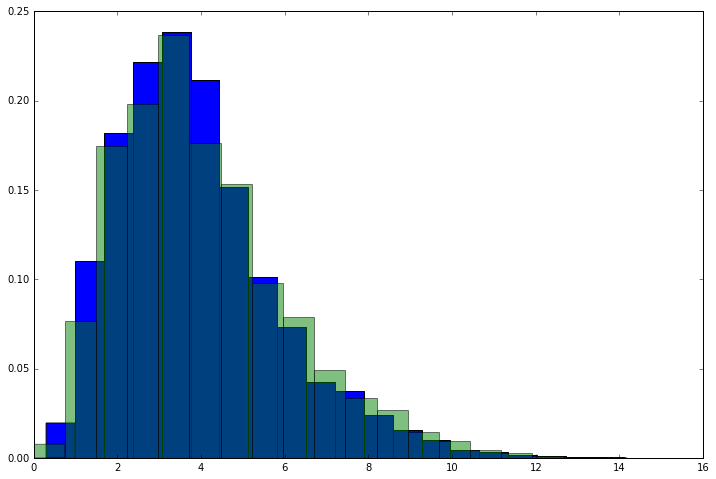

In [37]:
fig=plt.figure(figsize=(12,8))
plt.hist(akt_wind[akt_wind.WINDGESCHWINDIGKEIT<15].WINDGESCHWINDIGKEIT.dropna().values,normed=True, bins=20);
plt.hist(dwd_wind['2005-11-06':'2015-11-06'][dwd_wind.WINDGESCHWINDIGKEIT<15].WINDGESCHWINDIGKEIT.dropna().values,normed=True, bins=20, alpha=.5);

In [38]:
hist10_p=dwd_wind['2005-11-06':'2015-11-06'].WINDGESCHWINDIGKEIT.pow(3)
hist10_p[hist10_p>1000]
akt_p=akt_wind['2015-11-06':'2016-11-06'].WINDGESCHWINDIGKEIT.pow(3) 

In [39]:
hist10_p.mean(),akt_p.mean(),hist10_p.mean()/akt_p.mean()
#13% Weniger Windenergie im letzten Jahr

(124.49697750361425, 121.2165174538014, 1.0270628138699258)